In [82]:
import pandas as pd
import numpy as np
from collections import Counter

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# plotting libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline 
plt.style.use('ggplot') #plot style used by ggplot
mpl.rcParams['figure.figsize'] = (12.0, 7.0)
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF
py.sign_in('erikrood','3eqsrype8v')
sns.set_palette("husl")

In [90]:
companies = pd.read_csv('/Users/erikrood/desktop/ipython_datasets/Companies.csv')

In [7]:
companies.head()

,name,vertical,year,batch,url,description
0,Clickfacts,B2B,2005,s2005,http://clickfacts.com,NaN
1,Kiko,Consumer,2005,s2005,http://kiko.com,We're the best online calendar solution to eve...
2,Loopt,Enterprise,2005,s2005,http://loopt.com,NaN
3,Parakey,Consumer,2005,s2005,http://parakey.com,NaN
4,Reddit,Consumer,2005,s2005,http://reddit.com,NaN


In [9]:
print ("The total number of companies funded by YC since 2005:", companies.shape[0])

The total number of companies funded by YC since 2005: 883


## Total number of companies funded by year

In [31]:
companies_by_year_stg = companies[[0,2]]

In [32]:
companies_by_year = companies_by_year_stg.groupby('year').count().round(decimals=0).reset_index()
companies_by_year.head()

,year,name
0,2005,6
1,2006,7
2,2007,19
3,2008,14
4,2009,24


In [79]:
#bar chart
x = companies_by_year['year']
y = companies_by_year['name']

data = [
    go.Bar(
        x=x,
        y=y,
        
        marker=dict(
            color='rgb(20, 172, 255)',
            line=dict(
                color='rgb(8,48,107)',
                width=1.5
            ),
        ),
        opacity=0.8
    )
]
layout = go.Layout(
      title='Number of YC companies funded by year',
    xaxis=dict(
        title='year',
        tickangle = 47,
    ),
    yaxis=dict(
        title='number of companies'
    ),
     margin=go.Margin(
        b = 220
        
    )

    
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='companies_by_year')

## Total number of companies funded by season

In [42]:
companies_by_season_stg = companies[[0,3]]
companies_by_season = companies_by_season_stg.groupby('batch').count().round(decimals=0).reset_index()
companies_by_season.head()

,batch,name
0,s2005,6
1,s2006,3
2,s2007,10
3,s2008,6
4,s2009,15


In [80]:
#bar chart
x = companies_by_season['batch']
y = companies_by_season['name']

data = [
    go.Bar(
        x=x,
        y=y,
        
        marker=dict(
            color='rgb(247, 181, 81)',
            line=dict(
                color='rgb(8,48,107)',
                width=1.5
            ),
        ),
        opacity=0.8
    )
]
layout = go.Layout(
      title='Number of YC companies funded by batch season',
    xaxis=dict(
        title='season',
        tickangle = 47,
    ),
    yaxis=dict(
        title='number of companies'
    ),
     margin=go.Margin(
        b = 220
        
    )

    
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='companies_by_season')

## Summer v. Winter

In [48]:
summer = companies_by_season[companies_by_season['batch'].str.contains("s")==True]
sum(summer.name)

450

In [49]:
winter = companies_by_season[companies_by_season['batch'].str.contains("w")==True]
sum(winter.name)

433

## type of companies

In [50]:
print ("The total number of areas YC invests in", len(companies.vertical.unique()))

The total number of areas YC invests in 10


In [52]:
#renaming any null vertical to 'others'
companies['vertical']=['others' if pd.isnull(x) else x for x in companies['vertical']]

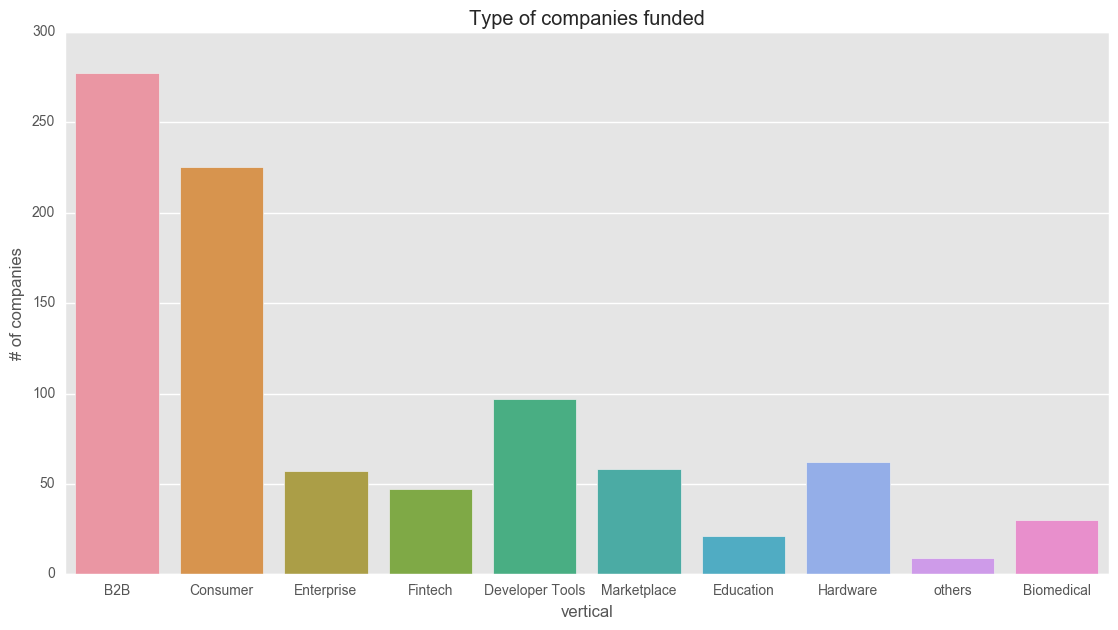

In [76]:
sns.countplot(companies.vertical)
plt.title('Type of companies funded')
plt.ylabel('# of companies')

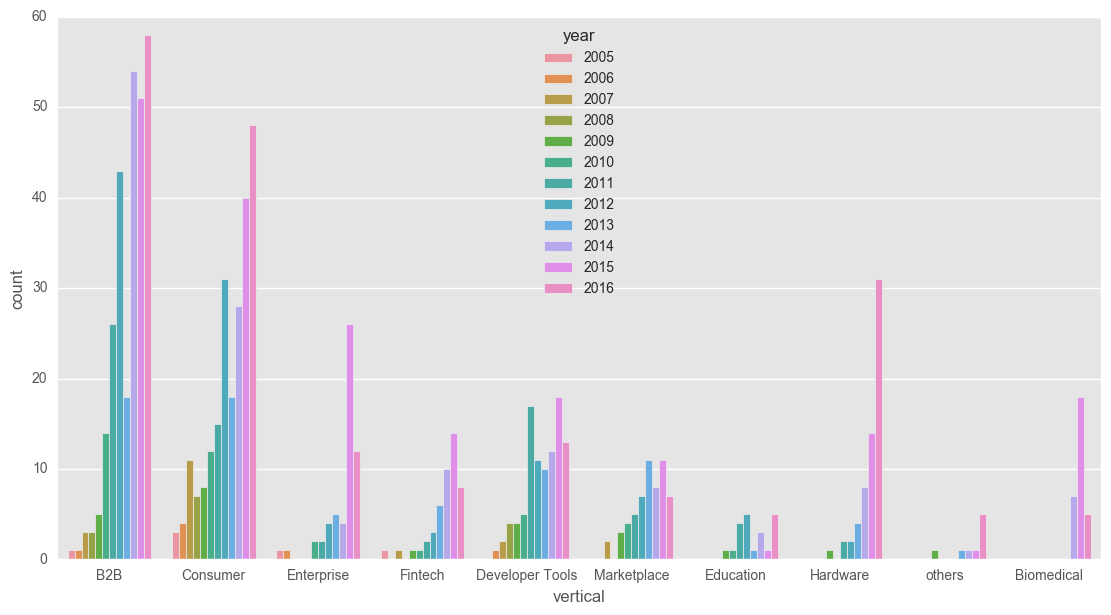

In [78]:
sns.countplot(companies['vertical'],hue=companies['year'])

## Text frequency in company descriptions

In [98]:
#first, convert description from non-null object to string
companies[['description']] = companies[['description']].astype(str)

,name,vertical,year,batch,url,description
0,Clickfacts,B2B,2005,s2005,http://clickfacts.com,nan
1,Kiko,Consumer,2005,s2005,http://kiko.com,We're the best online calendar solution to eve...
2,Loopt,Enterprise,2005,s2005,http://loopt.com,nan
3,Parakey,Consumer,2005,s2005,http://parakey.com,nan
4,Reddit,Consumer,2005,s2005,http://reddit.com,nan


In [114]:
d = dict(Counter(" ".join(companies["description"]).split()).most_common(100))
df = pd.DataFrame.from_dict(d, orient='index').reset_index()
df.columns = ['Text', 'n_count']
df = df.groupby('Text').sum().sort_values(by='n_count', ascending=False).round(decimals=0).reset_index()
#dropping anything with less than 4 letters to lose connector words, etc
df = df[df['Text'].map(len) > 3]
df.head(100)

,Text,n_count
9,with,106
10,your,105
11,that,101
14,platform,67
15,their,66
19,from,48
21,data,40
22,mobile,38
25,make,33
26,help,33


In [121]:
#a couple more manual drops
df = df[df.Text != 'with']
df = df[df.Text != 'from']
df = df[df.Text != 'that']
df = df[df.Text != 'them']
df = df[df.Text != 'their']
df = df[df.Text != 'your']

In [124]:
df.head(50)

,Text,n_count
14,platform,67
21,data,40
22,mobile,38
25,make,33
26,help,33
29,people,32
30,software,31
36,marketplace,25
37,more,25
38,into,25


In [134]:
#bar chart
x = df['Text']
y = df['n_count']

data = [
    go.Bar(
        x=x,
        y=y,
        
        marker=dict(
            color='rgb(20, 172, 255)',
            line=dict(
                color='rgb(8,48,107)',
                width=1.5
            ),
        ),
        opacity=0.8
    )
]
layout = go.Layout(
      title='Most common words in YC company descriptions',
    xaxis=dict(
        title='word',
        tickangle = 47,
    ),
    yaxis=dict(
        title='n-count of word'
    ),
     margin=go.Margin(
        b = 220
        
    )

    
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='company_descriptions')